The emphasis for this project would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [4]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is bike_rental.csv.


In [6]:
# Load the dataset
bike_rental_df = pd.read_csv('bike_rental.csv')
bike_rental_df.head()

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<b> 1.1 Create a bar chart to compare the average bike rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>

,weekday,holiday,count,order
2,Monday,No,4398.866667,0
3,Monday,Yes,3973.666667,0
8,Tuesday,No,4544.621359,1
9,Tuesday,Yes,1013.000000,1
10,Wednesday,No,4520.825243,2
11,Wednesday,Yes,7403.000000,2
6,Thursday,No,4720.343137,3
7,Thursday,Yes,1960.000000,3
0,Friday,No,4718.588235,4
1,Friday,Yes,3247.000000,4


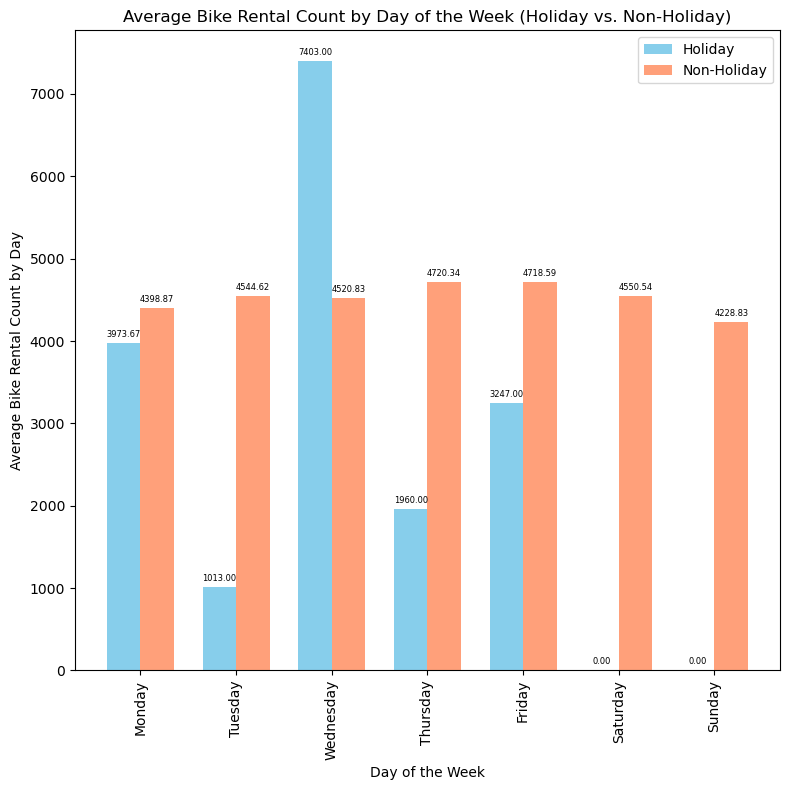

In [7]:
### Code here
grouped_df = bike_rental_df[["count","weekday","holiday"]].groupby(["weekday","holiday"]).mean().reset_index()
grouped_df['order'] = grouped_df['weekday'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})
grouped_df = grouped_df.sort_values('order')
display(grouped_df)
holiday_count = list(grouped_df['count'][grouped_df["holiday"]=='Yes']) + [0,0]
non_holiday_count = list(grouped_df['count'][grouped_df["holiday"]=='No'])


days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_indices = np.arange(len(days_of_week))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(8, 8))
holiday_bars = ax.bar(x_indices - bar_width/2, holiday_count, bar_width, label='Holiday', color='#87CEEB')
non_holiday_bars = ax.bar(x_indices + bar_width/2, non_holiday_count, bar_width, label='Non-Holiday', color= '#FFA07A')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Bike Rental Count by Day')
ax.set_title('Average Bike Rental Count by Day of the Week (Holiday vs. Non-Holiday)')
ax.set_xticks(x_indices)
ax.set_xticklabels(days_of_week, rotation=90)
ax.set_xticklabels(days_of_week)
ax.legend()

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=6)

annotate_bars(holiday_bars)
annotate_bars(non_holiday_bars)

plt.tight_layout()
plt.show()

In [5]:
### Comment here
print("""
There is a significant rental pattern difference between holiday and non-holiday weekdays.

During non-holidays, we observe a remarkable stability in the average rental counts over time, with the minimum and 
maximum values being relatively close to each other.

During holiday periods, there is a substantial fluctuation in the average bike rental counts over time. The minimum 
count can drop to around 1013, while the maximum count surges to approximately 7403.

In general, people tend to rent bikes more frequently on non-holidays compared to holidays. An exception to this 
trend is observed on Wednesdays, where bike rentals during holidays are notably higher.
""")


There is a significant rental pattern difference between holiday and non-holiday weekdays.

During non-holidays, we observe a remarkable stability in the average rental counts over time, with the minimum and 
maximum values being relatively close to each other.

During holiday periods, there is a substantial fluctuation in the average bike rental counts over time. The minimum 
count can drop to around 1013, while the maximum count surges to approximately 7403.

In general, people tend to rent bikes more frequently on non-holidays compared to holidays. An exception to this 
trend is observed on Wednesdays, where bike rentals during holidays are notably higher.



<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables. </b>
1. month 
2. season
3. working_day
4. weather
<b></b>

In [6]:
bike_rental_df[['month','count']].groupby("month").mean()

,count
month,
April,4484.900000
August,5664.419355
December,3403.806452
February,2655.298246
January,2176.338710
July,5563.677419
June,5772.366667
March,3692.258065
May,5349.774194


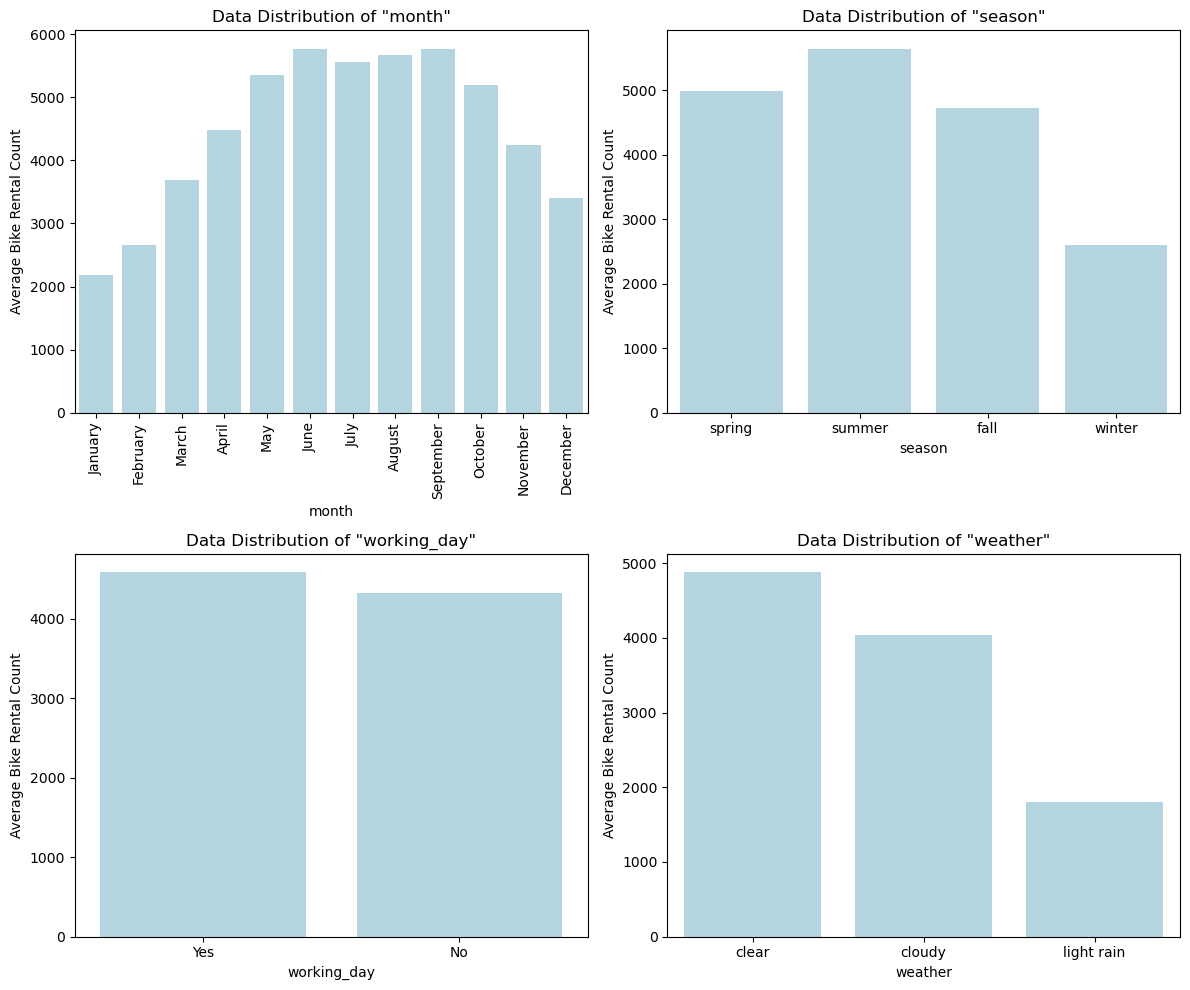

In [7]:
### Code here
categorical_variables = ['month', 'season', 'working_day', 'weather']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    average_bike_rental_count = bike_rental_df[[var,'count']].groupby(var).mean()
    
    if var == 'month':
        order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    elif var == 'season':
        order = ["spring", "summer", "fall", "winter"]
    else:
        average_bike_rental_count = average_bike_rental_count.sort_values(by='count', ascending=False)
        order = average_bike_rental_count.index

    sns.barplot(data=bike_rental_df, x=var, y='count', ax=ax, order=order, color='lightblue', ci=None)
    ax.set_title(f'Data Distribution of "{var}"')
    ax.set_xlabel(var)
    ax.set_ylabel(f'Average Bike Rental Count')
    
    
    if i == 0:
        ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

<b> 1.3 Compare the number of registered and casual bike rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

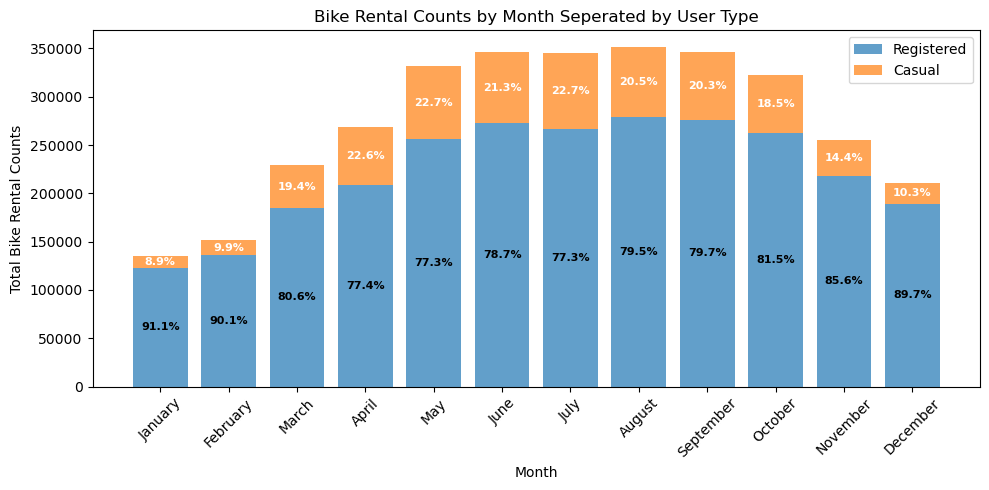

In [8]:
### Code here
import matplotlib.pyplot as plt
import pandas as pd
monthly_counts = bike_rental_df.groupby('month')[['registered', 'casual']].sum()
monthly_counts = monthly_counts.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fig, ax = plt.subplots(figsize=(10,5))
registered_bars = ax.bar(monthly_counts.index, monthly_counts['registered'], label='Registered', alpha=0.7)
casual_bars = ax.bar(monthly_counts.index, monthly_counts['casual'], label='Casual', bottom=monthly_counts['registered'], alpha=0.7)
ax.set_xlabel('Month')
ax.set_ylabel('Total Bike Rental Counts')
ax.set_title('Bike Rental Counts by Month Seperated by User Type')
ax.set_xticks(monthly_counts.index)
ax.set_xticklabels(monthly_counts.index, rotation=45)
ax.legend()
for bar1, bar2 in zip(registered_bars, casual_bars):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    total_height = height1 + height2
    ax.annotate(f'{height1 / total_height:.1%}',
                xy=(bar1.get_x() + bar1.get_width() / 2, height1 / 2),
                xytext=(0, 0),
                textcoords="offset points",
                ha='center', va='center', color='black', fontsize=8, fontweight='bold')

    ax.annotate(f'{height2 / total_height:.1%}',
                xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2),
                xytext=(0, 0),
                textcoords="offset points",
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

<b> 1.4 Plot relationships between the following features and the target variable count as a small multiple of scatter plots. </b>

1. temp
2. feels_temp
3. humidity
4. windspeed
<b></b>

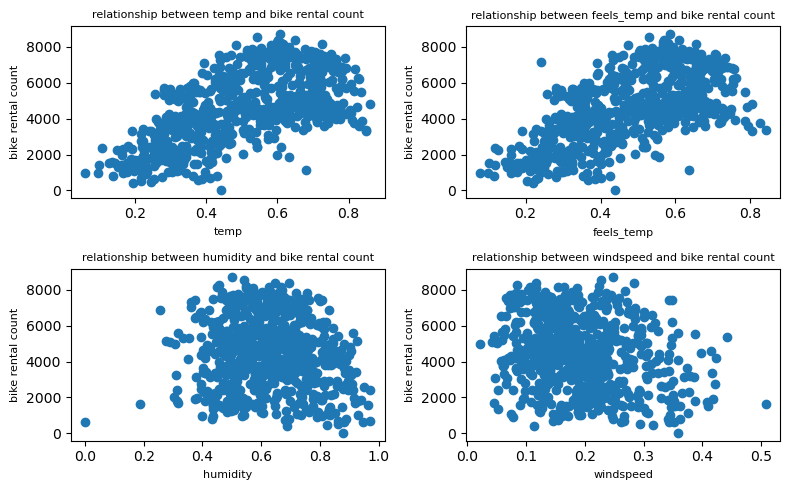

In [9]:
### Code here
features = ['temp','feels_temp','humidity','windspeed']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.scatter(bike_rental_df[feature], bike_rental_df['count'])
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel('bike rental count', fontsize=8)
    ax.set_title(f'relationship between {feature} and bike rental count', fontsize=8)
plt.tight_layout()
plt.show()


## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time. 

In [10]:
# split data into features and labels
bike_rental_X = bike_rental_df.drop(columns=['casual','registered','count'])
bike_rental_y = bike_rental_df['count']

**2.1.1 Plot the relationships between the label (count) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

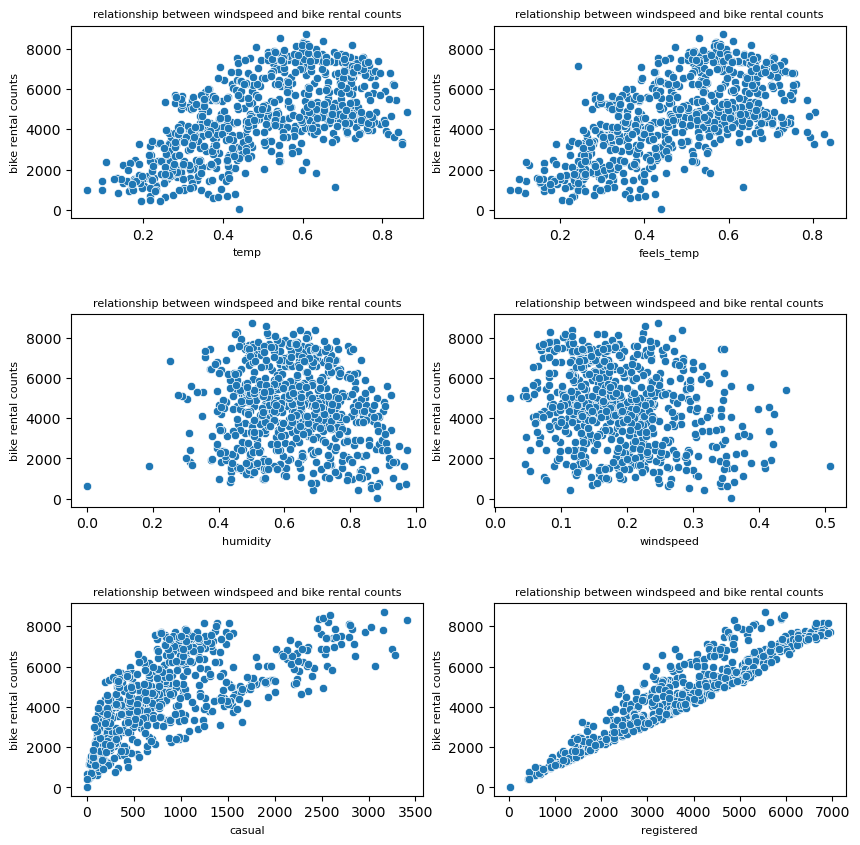

In [11]:
### Code here
num_features = ['temp', 'feels_temp', 'humidity', 'windspeed', 'casual', 'registered']
target = 'count'
fig, ax = plt.subplots(3, 2, figsize = (10,10))
fig.subplots_adjust(hspace=0.5)
for var, subplot in zip(num_features, ax.flatten()):
    sns.scatterplot(x=var, y=target, data = bike_rental_df, ax=subplot)
    subplot.set_title(f'relationship between {feature} and bike rental counts', fontsize=8)
    subplot.set_xlabel(var, fontsize=8)
    subplot.set_ylabel('bike rental counts', fontsize=8)


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [12]:
### Comment here
answer = """
As directed by TA Shruti Agarwal, 'casual' and 'registered' are dropped from the dataset.

After closely examining the scatter plots, several observations can be made:
1. There appears to be a positive linear relationship between 'temp' (temperature) and the target variable 'count.' 
As 'temp' increases, the 'count' tends to increase as well.
2. Similarly, there seems to be a positive linear relationship between 'feels_temp' (perceived temperature) and 
'count.' When 'feels_temp' rises, there is an evident uptick in 'count.'
3. On the flip side, 'windspeed' demonstrates a weak negative linear relationship with 'count.' As 'windspeed' 
increases, 'count' tends to decrease slightly.
4. Likewise, 'humidity' exhibits a mild negative linear relationship with 'count.' An increase in 'humidity' 
corresponds to a slight decrease in 'count.'

Considering these observations, It appears that linear regression could be a suitable modeling choice for this 
problem since all continuous variables exhibit some level of linearity with the target variable 'count'.
"""
print(answer)



As directed by TA Shruti Agarwal, 'casual' and 'registered' are dropped from the dataset.

After closely examining the scatter plots, several observations can be made:
1. There appears to be a positive linear relationship between 'temp' (temperature) and the target variable 'count.' 
As 'temp' increases, the 'count' tends to increase as well.
2. Similarly, there seems to be a positive linear relationship between 'feels_temp' (perceived temperature) and 
'count.' When 'feels_temp' rises, there is an evident uptick in 'count.'
3. On the flip side, 'windspeed' demonstrates a weak negative linear relationship with 'count.' As 'windspeed' 
increases, 'count' tends to decrease slightly.
4. Likewise, 'humidity' exhibits a mild negative linear relationship with 'count.' An increase in 'humidity' 
corresponds to a slight decrease in 'count.'

Considering these observations, It appears that linear regression could be a suitable modeling choice for this 
problem since all continuous variables ex

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the Bike Rental dataset.**

In [13]:
### Code here
ohe_features = ['month', 'season', 'holiday', 'weekday', 'working_day', 'weather']
ohe = OneHotEncoder(drop = 'first')
X_cate = bike_rental_X[ohe_features]
X_cate_encoded = ohe.fit_transform(X_cate)
X_cate_encoded = pd.DataFrame(X_cate_encoded.toarray(), columns=ohe.get_feature_names_out(X_cate.columns))
bike_rental_X_encoded = pd.concat([X_cate_encoded, bike_rental_X[["temp", "feels_temp", "humidity", "windspeed"]]], axis=1)
display(bike_rental_X_encoded.head())

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,season_spring,season_summer,season_winter,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,working_day_Yes,weather_cloudy,weather_light rain,temp,feels_temp,humidity,windspeed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.344167,0.363625,0.805833,0.160446
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.363478,0.353739,0.696087,0.248539
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.196364,0.189405,0.437273,0.248309
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.200000,0.212122,0.590435,0.160296
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.229270,0.436957,0.186900


In [14]:
# In one hot encoding, we need to drop one category for each encoded features to avoid overfitting

print("Baseline categories are follows:")
i = 0
for feature in ohe_features:
    print("Dropped category for", feature, "is", ohe.categories_[i][0])
    i += 1

Baseline categories are follows:
Dropped category for month is April
Dropped category for season is fall
Dropped category for holiday is No
Dropped category for weekday is Friday
Dropped category for working_day is No
Dropped category for weather is clear


**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

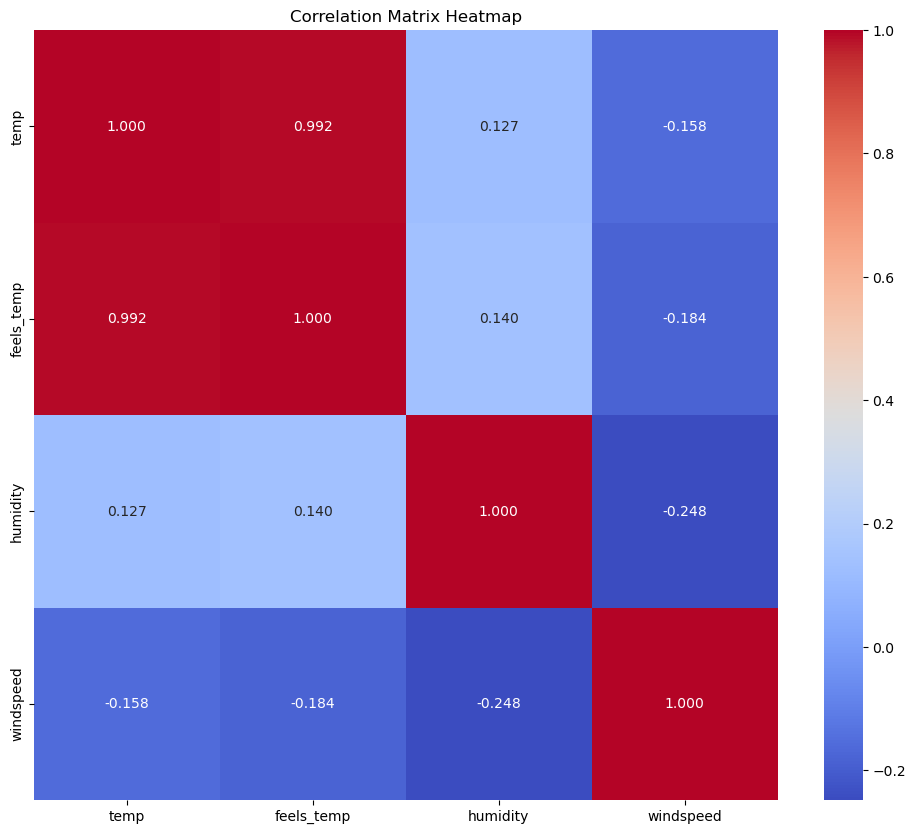

In [15]:
### Code here
correlation_matrix = bike_rental_X[["temp", "feels_temp", "humidity", "windspeed"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
### Code here
# iterate through every possible pairs of feature in the correlation_matrix and find any pairs with the absolute value of correlation greater than 0.9
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.9:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add((colname_i, colname_j))
print("highly_correlated_features:", highly_correlated_features)

highly_correlated_features: {('feels_temp', 'temp')}


In [17]:
### Code here
# Drop first feature from each highly correlated pair we got
for f1, f2 in highly_correlated_features:
    bike_rental_X_encoded = bike_rental_X_encoded.drop(f1, axis=1)
bike_rental_X_encoded.head()

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,season_spring,season_summer,season_winter,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,working_day_Yes,weather_cloudy,weather_light rain,temp,humidity,windspeed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.196364,0.437273,0.248309
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.200000,0.590435,0.160296
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900


In [18]:
### Comment here
answer = """
From the correlation matrix, it is evident that 'feels_temp' and 'temp' exhibit a strong correlation with a coefficient 
exceeding 0.9. In the context of non-regularized machine learning models like linear regression, this high correlation 
presents a noteworthy issue. Specifically, it becomes difficult for the model to disentangle the individual effects of 
these highly correlated variables. 

As a result, it can lead to unstable coefficients, where minor variations in the training data can cause substantial 
fluctuations in the estimated coefficients.
""" 
print(answer)


From the correlation matrix, it is evident that 'feels_temp' and 'temp' exhibit a strong correlation with a coefficient 
exceeding 0.9. In the context of non-regularized machine learning models like linear regression, this high correlation 
presents a noteworthy issue. Specifically, it becomes difficult for the model to disentangle the individual effects of 
these highly correlated variables. 

As a result, it can lead to unstable coefficients, where minor variations in the training data can cause substantial 
fluctuations in the estimated coefficients.



**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [19]:
### Code here
bike_rental_X_dev, bike_rental_X_test, bike_rental_y_dev, bike_rental_y_test = train_test_split(bike_rental_X_encoded, bike_rental_y, random_state = 123, test_size=0.2)

**2.1.6 Standardize the columns in the feature matrices.**

In [20]:
### Code here
# get the feature names
feature_names = ['bias_term'] + list(bike_rental_X_dev.columns)

# initialize a standard scalar
ss = StandardScaler()

# fit and transform the numeric features in the training set
bike_rental_X_train = ss.fit_transform(bike_rental_X_train)

# transform the numeric features in the validation set
bike_rental_X_val = ss.transform(bike_rental_X_val)

# transform the numeric features in the test set
bike_rental_X_test = ss.transform(bike_rental_X_test)

In [21]:
### Code here
#Adding a column of ones to the feature matrices for the bias term.
bike_rental_X_train = np.hstack([np.ones((bike_rental_X_train.shape[0], 1)), bike_rental_X_train])
bike_rental_X_val = np.hstack([np.ones((bike_rental_X_val.shape[0], 1)), bike_rental_X_val])
bike_rental_X_test = np.hstack([np.ones((bike_rental_X_test.shape[0], 1)), bike_rental_X_test])

At the end of this pre-processing, you should have the following vectors and matrices: 
- Bike Rental Prediction dataset: bike_rental_X_train, bike_rental_X_val, bike_rental_X_test, bike_rental_y_train, bike_rental_y_val, bike_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [22]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        
        ### Create a copy of the dataframe
        X_copy = X.copy()
        
        ### Create an identity matrix that is equal to the number of columns in the matrix
        num_columns = X.shape[1]
        I = np.identity(num_columns)
         
        ### Calculating the coefficient for each feature and baseline
        self.w =  np.linalg.solve(np.dot(X.T,X) + self.alpha * I, np.dot(X.T,y))    
        
        return None
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X.dot(self.w)
        return y_pred

### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the bike rental training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [23]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.
    
    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [24]:
### Code here
alpha_value = 0
lr_model = LinearRegression(alpha=alpha_value)
lr_model.train(bike_rental_X_train, bike_rental_y_train)
y_pred_train = lr_model.predict(bike_rental_X_train)
y_pred_val = lr_model.predict(bike_rental_X_val)
y_pred_test = lr_model.predict(bike_rental_X_test)
r_squared_train = r2_score(bike_rental_y_train, y_pred_train)
r_squared_val = r2_score(bike_rental_y_val, y_pred_val)
r_squared_test = r2_score(bike_rental_y_test, y_pred_test)
print("r_squared_train:",r_squared_train)
print("r_squared_val:",r_squared_val)
print("r_squared_test:",r_squared_test)
print()
print()
print("report on the first 3 and last 3 predictions on the test set")
display(get_report(y_pred_test, bike_rental_y_test))

r_squared_train: 0.5908256183327467
r_squared_val: 0.6623812987480509
r_squared_test: 0.4288359586179482


report on the first 3 and last 3 predictions on the test set


,Prediction,Actual
Position,,
1,4971.615738,6421
2,2929.749794,3389
3,3532.286406,2252
145,4561.874624,6192
146,3425.456164,4996
147,4797.509709,4433


**2.1.9 As a baseline model, use the mean of the training labels (bike_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [25]:
### Code here
y_pred = np.mean(bike_rental_y_train)
y_pred_train = np.full_like(bike_rental_y_train, y_pred)
y_pred_val = np.full_like(bike_rental_y_val, y_pred)
y_pred_test = np.full_like(bike_rental_y_test, y_pred)
r_squared_train = r2_score(bike_rental_y_train, y_pred_train)
r_squared_val = r2_score(bike_rental_y_val, y_pred_val)
r_squared_test = r2_score(bike_rental_y_test, y_pred_test)
print("r_squared_train:",r_squared_train)
print("r_squared_val:",r_squared_val)
print("r_squared_test:",r_squared_test)

r_squared_train: -1.9052405497710367e-07
r_squared_val: -0.0022508395700047146
r_squared_test: -0.0005850204299353567


**2.1.10 Interpret your model trained on the bike rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

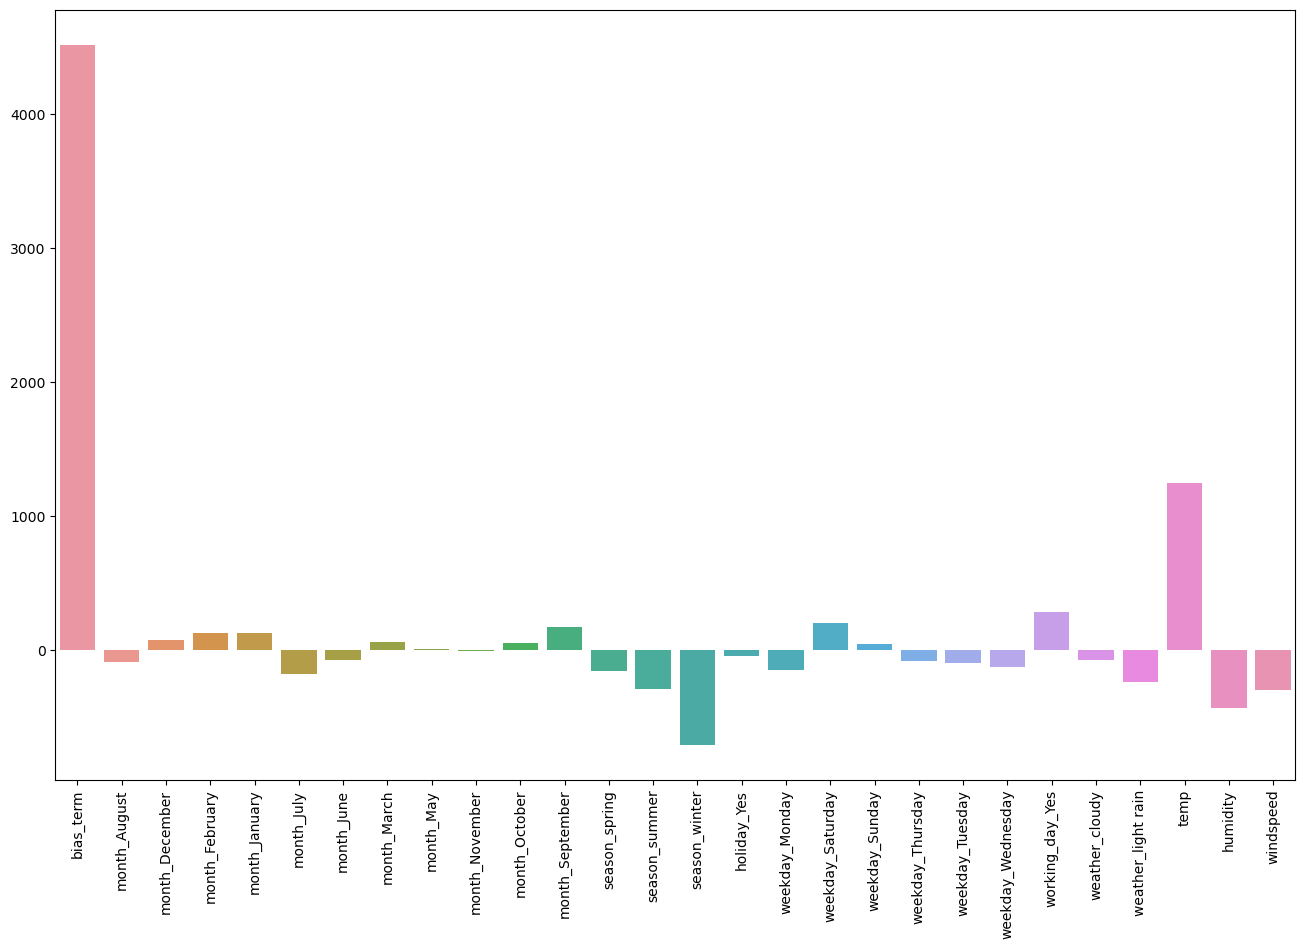

In [26]:
### Code here
fig = plt.figure(figsize = (16,10))
ax = sns.barplot(x = feature_names, y = lr_model.w)
ax.tick_params(axis = "x", rotation = 90)

**2.1.11 According to your model, which features are the greatest contributors to the car price?**

In [27]:
### Comment here
weights = list(lr_model.w)
feature_weights = [(feature, weight) for feature, weight in zip(feature_names, weights)]
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

top_3_pos_features = sorted_feature_weights[:3]
print("The greatest contributors to more bike rental counts are those features with the greatest positive coefficient:")
print("Top 3 features contribute to more bike rental counts:")
for feature, weight in top_3_pos_features:
    print(f"one unit of standardized {feature} contributes: {weight}")
print()
print()
top_3_neg_features = sorted_feature_weights[-3:]
print("The greatest contributors to less bike rental counts are those features with the lowest negative coefficient:")
print("Top 3 features contribute to less bike rental counts:")
for feature, weight in top_3_neg_features:
    print(f"one unit of standardized {feature} contributes: {weight}")

The greatest contributors to more bike rental counts are those features with the greatest positive coefficient:
Top 3 features contribute to more bike rental counts:
one unit of standardized bias_term contributes: 4514.844748858448
one unit of standardized temp contributes: 1246.7309216474428
one unit of standardized working_day_Yes contributes: 284.5286948928381


The greatest contributors to less bike rental counts are those features with the lowest negative coefficient:
Top 3 features contribute to less bike rental counts:
one unit of standardized windspeed contributes: -294.87744985544253
one unit of standardized humidity contributes: -427.84368425178553
one unit of standardized season_winter contributes: -704.0446050227295


### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the bike rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

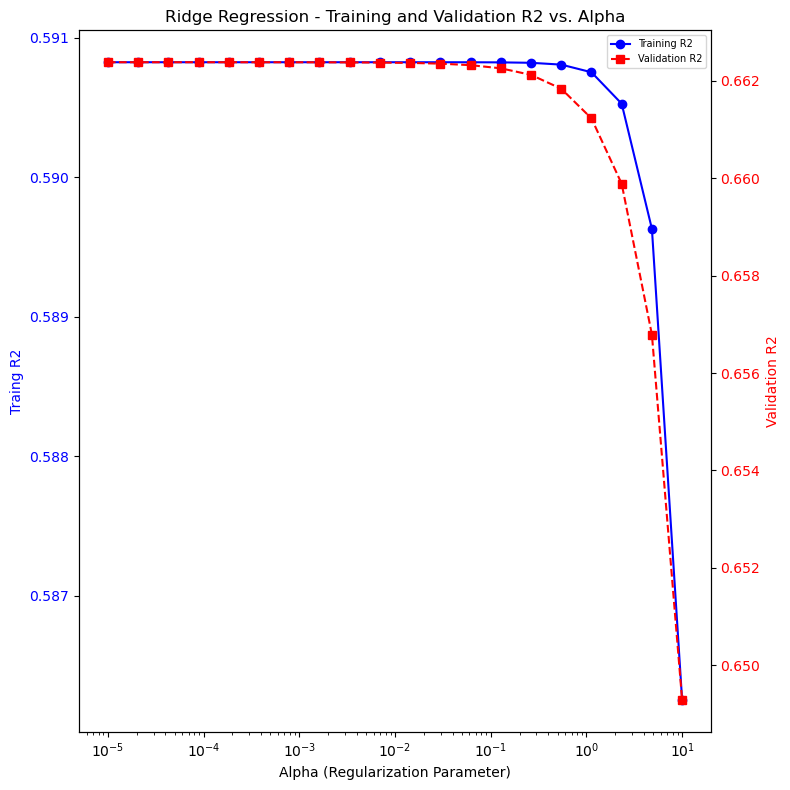

In [28]:
### Code here
alphas = np.logspace(-5, 1, 20)
train_r2_scores = list()
val_r2_scores = list()
for alpha in alphas:
    ridge_model = LinearRegression(alpha=alpha)
    ridge_model.train(bike_rental_X_train, bike_rental_y_train)
    y_pred_train = ridge_model.predict(bike_rental_X_train)
    train_r2 = r2_score(bike_rental_y_train, y_pred_train)
    train_r2_scores.append(train_r2)
    y_pred_val = ridge_model.predict(bike_rental_X_val)
    val_r2 = r2_score(bike_rental_y_val, y_pred_val)
    val_r2_scores.append(val_r2)

fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.plot(alphas, train_r2_scores, label='Training R2', linestyle='-', marker='o', color='b')
ax1.set_ylabel("Training R2", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.set_xlabel('Alpha (Regularization Parameter)')
ax2 = ax1.twinx()
ax2.plot(alphas, val_r2_scores, label='Validation R2', linestyle='--', marker='s', color='r')
ax1.set_ylabel("Traing R2", color='b')
ax2.set_ylabel("Validation R2", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xscale('log') 
plt.title('Ridge Regression - Training and Validation R2 vs. Alpha')
fig.tight_layout()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=7)
plt.show()

In [29]:
print("alpha and related training r^2 and validation r^2")
print("{:<25} {:<25} {:<25}".format("Alpha", "Training R^2", "Validation R^2"))
print("-" * 70)

for index in range(len(alphas)):
    print("{:<25} {:<25} {:<25}".format(alphas[index], train_r2_scores[index], val_r2_scores[index]))

alpha and related training r^2 and validation r^2
Alpha                     Training R^2              Validation R^2           
----------------------------------------------------------------------
1e-05                     0.5908256183327408        0.6623812890138183       
2.06913808111479e-05      0.5908256183327217        0.66238127860657         
4.281332398719396e-05     0.5908256183326398        0.6623812570725046       
8.858667904100833e-05     0.5908256183322891        0.6623812125154138       
0.00018329807108324357    0.5908256183307883        0.6623811203200591       
0.000379269019073225      0.5908256183243623        0.6623809295526495       
0.0007847599703514606     0.5908256182968504        0.6623805348178758       
0.001623776739188721      0.5908256181790665        0.6623797180114819       
0.003359818286283781      0.5908256176748259        0.6623780277308748       
0.0069519279617756054     0.5908256155162767        0.6623745294705259       
0.01438449888287663  

In [30]:
best_alpha_index = np.argmax(val_r2_scores)
best_alpha = alphas[best_alpha_index]
best_val_r2 = val_r2_scores[best_alpha_index]
print("Best Alpha:", best_alpha)
print("Best Validation R2 Score:", best_val_r2)

Best Alpha: 1e-05
Best Validation R2 Score: 0.6623812890138183


**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [31]:
### Comment here
answer = '''
In our data set with alpha range: np.logspace(-5, 1, 20), both traing R^2 and validation R^2 tend to decrease as alpha 
increases.

However, In general, as the model complexity decreases (alpha increases):
(1) The training R^2 tends to decrease.
(2) The validation R^2 exhibits an initial increase followed by a subsequent decrease.

it's important to note that the range of alpha values in our analysis is limited to np.logspace(-5, 1, 20). 
This limitation make us only observe that both the training R^2 and validation R^2 decrease within this specific alpha 
range. To gain a more comprehensive understanding of the trend, we would need to expand the range of alpha values 
and explore a wider range of alpha such as np.logspace(-20, 1, 20) to see the general trend of validation R^2, which 
increases initailly and then decreases.
'''
print(answer)


In our data set with alpha range: np.logspace(-5, 1, 20), both traing R^2 and validation R^2 tend to decrease as alpha 
increases.

However, In general, as the model complexity decreases (alpha increases):
(1) The training R^2 tends to decrease.
(2) The validation R^2 exhibits an initial increase followed by a subsequent decrease.

it's important to note that the range of alpha values in our analysis is limited to np.logspace(-5, 1, 20). 
This limitation make us only observe that both the training R^2 and validation R^2 decrease within this specific alpha 
range. To gain a more comprehensive understanding of the trend, we would need to expand the range of alpha values 
and explore a wider range of alpha such as np.logspace(-20, 1, 20) to see the general trend of validation R^2, which 
increases initailly and then decreases.



### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [32]:
### Code here
loan_data_df = pd.read_csv('loan_data.csv')

In [33]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

In [34]:
display(loan_data_df.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [35]:
### Code here
missing_val_col = list()
for column in loan_data_df.columns:
    missing_count = loan_data_df[column].isnull().sum()
    print("The amount of missing values for",column,missing_count)
    if missing_count>0:
        missing_val_col.append(column)
print()
print("Columns with missing values:",missing_val_col)

The amount of missing values for Gender 13
The amount of missing values for Married 3
The amount of missing values for Dependents 15
The amount of missing values for Education 0
The amount of missing values for Self_Employed 32
The amount of missing values for ApplicantIncome 0
The amount of missing values for CoapplicantIncome 0
The amount of missing values for LoanAmount 22
The amount of missing values for Loan_Amount_Term 14
The amount of missing values for Credit_History 50
The amount of missing values for Property_Area 0
The amount of missing values for Loan_Status 0

Columns with missing values: ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [36]:
### Code here
categories = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
continuous = ['LoanAmount','Loan_Amount_Term']
# for missing values in categorical vairables, I will replace by mode
# for missing values in continuous variables, I will replace by media
for category in categories:
    loan_data_df[category].fillna(loan_data_df[category].mode()[0], inplace=True)
for feature in continuous:
    loan_data_df[feature].fillna(loan_data_df[feature].median(), inplace=True)

In [37]:
### Comment here
answer = """
(1) For categorical variables ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History'], I replace 
the null with the mode becuase this will ensure the imputed value aligns with the existing distribution.
(2) For continuous vairables ['LoanAmount','Loan_Amount_Term'], I replaced the null value with the mean since it 
is less sensitive to the outliers and protect the overall statistical properties of the data.
"""
print(answer)


(1) For categorical variables ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History'], I replace 
the null with the mode becuase this will ensure the imputed value aligns with the existing distribution.
(2) For continuous vairables ['LoanAmount','Loan_Amount_Term'], I replaced the null value with the mean since it 
is less sensitive to the outliers and protect the overall statistical properties of the data.



**2.2.3 Encode the categorical variables.**

In [38]:
### Code here
ohe_features = ["Gender", "Married", "Self_Employed", "Credit_History", "Property_Area", "Education"]
ordinal_features = ["Dependents"]
num_features = ["LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term"]
target = ["Loan_Status"]

ohe = OneHotEncoder(drop = 'first')
X_ohe = loan_data_df[ohe_features]
X_ohe_encoded = ohe.fit_transform(X_ohe)
X_ohe_encoded = pd.DataFrame(X_ohe_encoded.toarray(), columns=ohe.get_feature_names_out(X_ohe.columns))
loan_data_df_encoded = pd.concat([X_ohe_encoded, loan_data_df[ordinal_features + num_features + target]],axis=1)
# In one hot encoding, we need to drop one category for each encoded features to avoid overfitting
print("Base line categories are follows:")
i = 0
for feature in ohe_features:
    print("Dropped category for", feature, "is", ohe.categories_[i][0])
    i += 1

enc1 = OrdinalEncoder(categories = [['0', '1', '2', '3+']])
loan_data_df_encoded["Dependents"] = enc1.fit_transform(loan_data_df_encoded["Dependents"].to_numpy().reshape(-1,1))

loan_data_df_encoded.head()

Base line categories are follows:
Dropped category for Gender is Female
Dropped category for Married is No
Dropped category for Self_Employed is No
Dropped category for Credit_History is 0.0
Dropped category for Property_Area is Rural
Dropped category for Education is Graduate


,Gender_Male,Married_Yes,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate,Dependents,LoanAmount,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,128.0,5849,0.0,360.0,Y
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,128.0,4583,1508.0,360.0,N
2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,66.0,3000,0.0,360.0,Y
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,120.0,2583,2358.0,360.0,Y
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,141.0,6000,0.0,360.0,Y


**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [39]:
### Code here
prob_y = len(loan_data_df_encoded[loan_data_df_encoded['Loan_Status'] == 'Y'])/len(loan_data_df_encoded)
prob_n = len(loan_data_df_encoded[loan_data_df_encoded['Loan_Status'] == 'N'])/len(loan_data_df_encoded)
print("Probability of category Y:", round(prob_y,3))
print("Probability of category N:", round(prob_n,3))

Probability of category Y: 0.687
Probability of category N: 0.313


In [40]:
### Comment here
answer = """
No, the distribution of labels in the dataset is not balanced. The 'Y' label appears approximately twice as 
frequently as the 'N' label.
"""
print(answer)


No, the distribution of labels in the dataset is not balanced. The 'Y' label appears approximately twice as 
frequently as the 'N' label.



**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

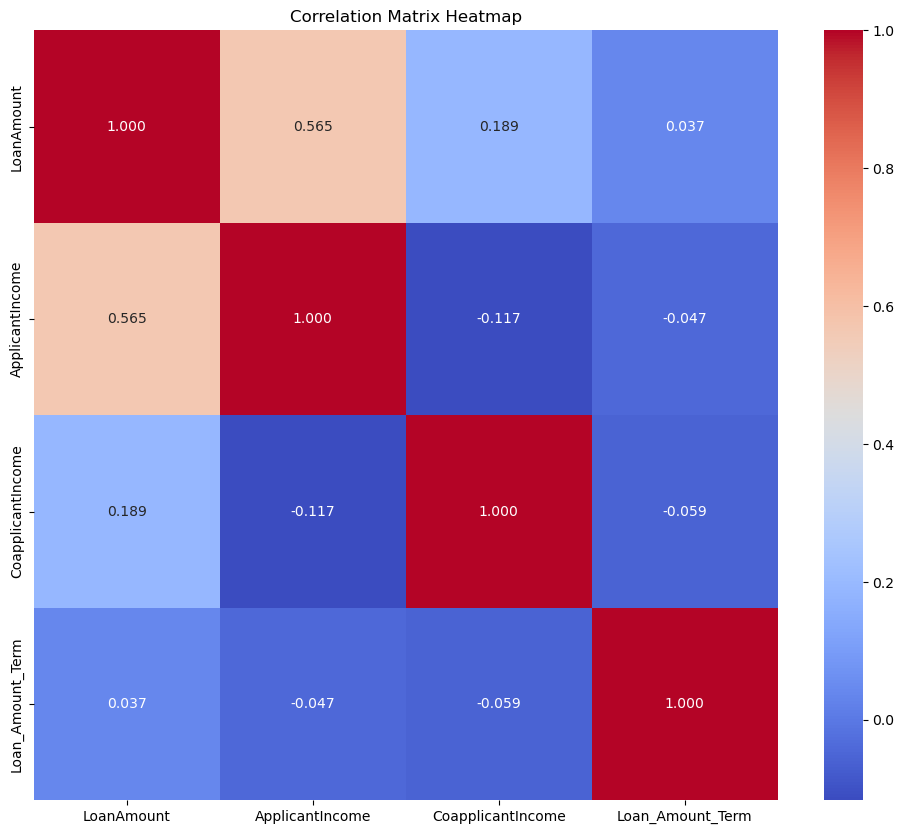

In [41]:
### Code here
X_loan_data = loan_data_df_encoded.drop(columns=['Loan_Status'])
y_loan_data = loan_data_df_encoded['Loan_Status']

correlation_matrix = X_loan_data[num_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
### Code here
print("There is no highly correlated pair of vairables with correlation greater than 0.9")

There is no highly correlated pair of vairables with correlation greater than 0.9


In [43]:
### Code here


**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [44]:
### Code here
### Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
y_loan_data = np.array(y_loan_data.map({'Y': 1, 'N': 0})).reshape(-1, 1)

### Split the dataset into training (60%), validation (20%), and test (20%) sets.
loan_data_X_dev, loan_data_X_test, loan_data_y_dev, loan_data_y_test = train_test_split(X_loan_data, y_loan_data, random_state = 123, test_size=0.2, stratify=y_loan_data)
loan_data_X_train, loan_data_X_val, loan_data_y_train, loan_data_y_val = train_test_split(loan_data_X_dev, loan_data_y_dev, random_state = 123, test_size = 0.25, stratify=loan_data_y_dev)

### Get feature names out
feature_names = ['bias_term'] + list(loan_data_X_dev.columns)

### Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
ss = StandardScaler()
loan_data_X_train = ss.fit_transform(loan_data_X_train)
loan_data_X_val = ss.transform(loan_data_X_val)
loan_data_X_test = ss.fit_transform(loan_data_X_test)

### Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.
loan_data_X_train = np.hstack([np.ones((loan_data_X_train.shape[0], 1)), loan_data_X_train])
loan_data_X_val = np.hstack([np.ones((loan_data_X_val.shape[0], 1)), loan_data_X_val])
loan_data_X_test = np.hstack([np.ones((loan_data_X_test.shape[0], 1)), loan_data_X_test])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [45]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

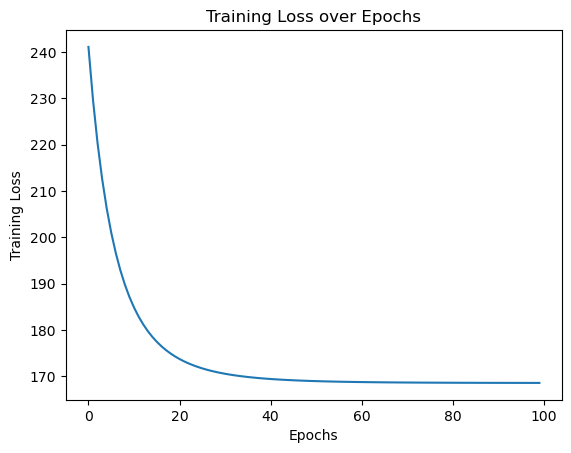

In [46]:
### Code here
# i) Using your implementation above, train a logistic regression model (alpha=0, t=100, eta=1e-3) on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge
lg_model_1 = LogisticRegression(alpha=0, t=100, eta=1e-3)
train_losses = lg_model_1.train(loan_data_X_train, loan_data_y_train)
train_losses = np.array([arr[0, 0] for arr in train_losses])
plt.plot(range(len(train_losses)), train_losses)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()


In [47]:
# ii) Using alpha between (0,1), eta between(0, 0.001) and t between (0, 100), find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.
### Code here 
alpha_min, alpha_max = 0.0, 1.0
t_min, t_max = 0, 100
eta_min, eta_max = 0.0, 0.001
num_points = 20
random_points = []
for _ in range(num_points):
    alpha = np.random.uniform(alpha_min, alpha_max)
    t = np.random.randint(t_min, t_max)
    eta = np.random.uniform(eta_min, eta_max)
    random_points.append([alpha, t, eta])

validation_metrics = list()

for params in random_points:
    model = LogisticRegression(alpha=params[0], t=params[1], eta=params[2])
    train_losses = model.train(loan_data_X_train, loan_data_y_train)
    score = accuracy_score(loan_data_y_val, model.predict(loan_data_X_val))
    validation_metrics.append({'alpha': params[0], 't': params[1], 'eta': params[2], 'score': score})

best_hyperparameters = max(validation_metrics, key=lambda x: x['score'])

lg_model_2 = LogisticRegression(alpha=best_hyperparameters['alpha'], t=best_hyperparameters['t'], eta=best_hyperparameters['eta'])
train_losses = lg_model_2.train(loan_data_X_train,loan_data_y_train)
print("best hyperparameters set:", best_hyperparameters)

best hyperparameters set: {'alpha': 0.25308860917868425, 't': 47, 'eta': 0.00046697235780620373, 'score': 0.8292682926829268}


In [48]:
# iii) Compare accuracy on the test dataset for both the scenarios.

lg_model_1_y_pred_test = lg_model_1.predict(loan_data_X_test) 
accuracy_model_1 = accuracy_score(loan_data_y_test, lg_model_1_y_pred_test)
lg_model_2_y_pred_test = lg_model_2.predict(loan_data_X_test)
accuracy_model_2 = accuracy_score(loan_data_y_test, lg_model_2_y_pred_test)
print("test accuracy score on scenario 1:", accuracy_model_1)
print("test accuracy score on scenario 2:", accuracy_model_2)

test accuracy score on scenario 1: 0.7967479674796748
test accuracy score on scenario 2: 0.7967479674796748


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

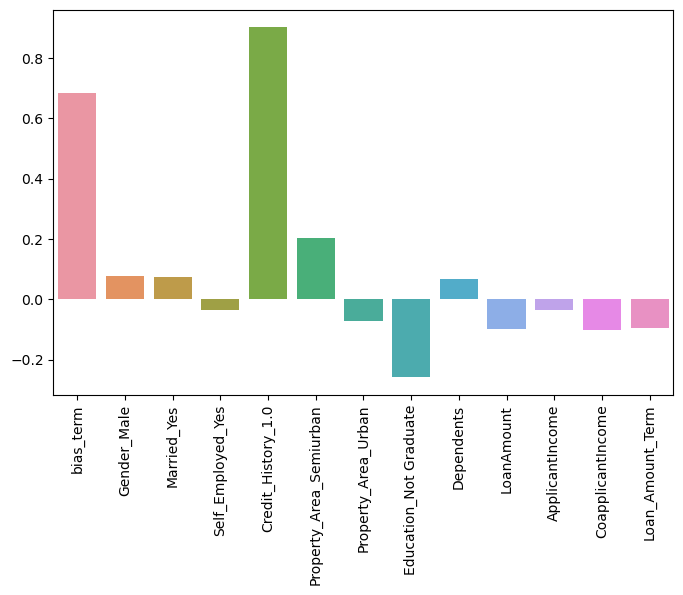

In [49]:
### Code here
fig = plt.figure(figsize = (8,5))
ax = sns.barplot(x = feature_names, y = list(lg_model_2.w.ravel()))
ax.tick_params(axis = "x", rotation = 90)

In [50]:
### Comment here
weights = list(lg_model_2.w.ravel())
feature_weights = [(feature, weight) for feature, weight in zip(feature_names, weights)]
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

top_3_pos_features = sorted_feature_weights[:3]
print("The greatest contributors to good loan status are those features with the greatest positive coefficient:")
print("Top 3 features contribute to good loan status:")
for feature, weight in top_3_pos_features:
    print(f"one unit of standardized {feature} contributes: {weight}")
print()
print()
top_3_neg_features = sorted_feature_weights[-3:]
print("The greatest contributors to bad loan status are those features with the lowest negative coefficient:")
print("Top 3 features contribute to bad loan status:")
for feature, weight in top_3_neg_features:
    print(f"one unit of standardized {feature} contributes: {weight}")

The greatest contributors to good loan status are those features with the greatest positive coefficient:
Top 3 features contribute to good loan status:
one unit of standardized Credit_History_1.0 contributes: 0.9017094464350444
one unit of standardized bias_term contributes: 0.6840990622434951
one unit of standardized Property_Area_Semiurban contributes: 0.2038612445743533


The greatest contributors to bad loan status are those features with the lowest negative coefficient:
Top 3 features contribute to bad loan status:
one unit of standardized LoanAmount contributes: -0.09917655551555593
one unit of standardized CoapplicantIncome contributes: -0.10328324973830735
one unit of standardized Education_Not Graduate contributes: -0.25822475252054844


### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [51]:
### Code here
SVC_primal = LinearSVC(dual=False)
SVC_primal.fit(loan_data_X_train, loan_data_y_train.ravel())

y_pred_train = SVC_primal.predict(loan_data_X_train)
y_pred_val = SVC_primal.predict(loan_data_X_val)
y_pred_test = SVC_primal.predict(loan_data_X_test)

accuracy_train = accuracy_score(loan_data_y_train.ravel(),y_pred_train)
accuracy_val = accuracy_score(loan_data_y_val.ravel(), y_pred_val)
accuracy_test = accuracy_score(loan_data_y_test.ravel(), y_pred_test)
print("training accuracy:", accuracy_train)
print("validation accuracy:", accuracy_val)
print("test accuracy:", accuracy_test)

training accuracy: 0.8070652173913043
validation accuracy: 0.8373983739837398
test accuracy: 0.7967479674796748


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [52]:
### Code here
SVC_primal = LinearSVC(max_iter = 10000, dual=True)
SVC_primal.fit(loan_data_X_train, loan_data_y_train.ravel())

y_pred_train = SVC_primal.predict(loan_data_X_train)
y_pred_val = SVC_primal.predict(loan_data_X_val)
y_pred_test = SVC_primal.predict(loan_data_X_test)

accuracy_train = accuracy_score(loan_data_y_train.ravel(),y_pred_train)
accuracy_val = accuracy_score(loan_data_y_val.ravel(), y_pred_val)
accuracy_test = accuracy_score(loan_data_y_test.ravel(), y_pred_test)
print("training accuracy:", accuracy_train)
print("validation accuracy:", accuracy_val)
print("test accuracy:", accuracy_test)

training accuracy: 0.8070652173913043
validation accuracy: 0.8373983739837398
test accuracy: 0.7967479674796748
